In [355]:
import os
path = os.getcwd() + '\data\Chennai_house_univariate_train.csv'
raw_data=pd.read_csv(path)
raw_data.head()

,Size,Price
0,502.69,6.3
1,503.65,6.3
2,505.46,6.5
3,505.94,6.5
4,507.02,6.6


In [356]:
raw_data.describe()

,Size,Price
count,97.000000,97.000000
mean,815.980000,19.908247
std,386.988353,17.767208
min,502.690000,6.300000
25%,570.770000,9.300000
50%,658.940000,12.700000
75%,857.810000,20.900000
max,2220.300000,86.400000


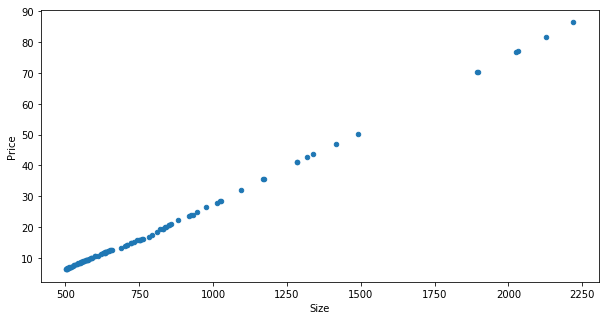

In [357]:
raw_data.plot(kind='scatter',x='Size',y='Price',figsize=(10,5))

In [358]:
data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
data.head()

,Size,Price
0,-0.182399,-0.169891
1,-0.181840,-0.169891
2,-0.180786,-0.167394
3,-0.180507,-0.167394
4,-0.179878,-0.166145


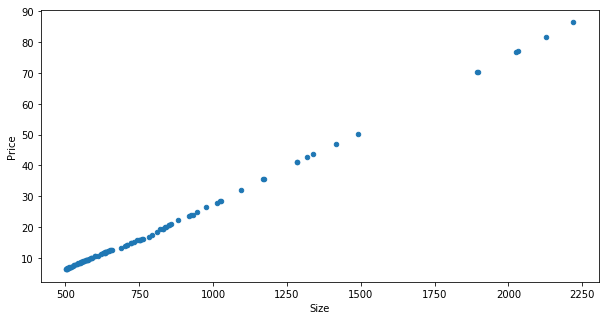

In [359]:
raw_data.plot(kind='scatter',x='Size',y='Price',figsize=(10,5))

In [360]:
data.shape

(97, 2)

In [361]:
data.insert(0,'Ones',1)
data.head()

,Ones,Size,Price
0,1,-0.182399,-0.169891
1,1,-0.181840,-0.169891
2,1,-0.180786,-0.167394
3,1,-0.180507,-0.167394
4,1,-0.179878,-0.166145


In [362]:
cols= data.shape[1]
print (cols)

3


In [363]:
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [364]:
x=np.matrix(x)
y=np.matrix(y)
theta=np.matrix(np.array([0,0]))

In [365]:
x.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [366]:
def computeError(x, y, theta):
    inner = np.power(((x*theta.T)-y),2)
    return np.sum(inner)/(2 * len(x))

In [367]:
computeError(x,y,theta)

0.024346853685025278

In [368]:
Learn_rate= 1
iters = 150
def gradientDescent(x, y, theta, Learn_rate, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((Learn_rate/ len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computeError(x, y, theta)
        
    return theta, cost

In [369]:
theta, cost = gradientDescent(x, y, theta, Learn_rate, iters)
print(theta, cost)

[[-9.65364673e-17  9.82955251e-01]] [2.19673183e-02 1.98208708e-02 1.78846789e-02 1.61381471e-02
 1.45626971e-02 1.31415706e-02 1.18596508e-02 1.07033016e-02
 9.66022291e-03 8.71931915e-03 7.87058178e-03 7.10498263e-03
 6.41437789e-03 5.79142147e-03 5.22948685e-03 4.72259664e-03
 4.26535895e-03 3.85291006e-03 3.48086268e-03 3.14525926e-03
 2.84252994e-03 2.56945453e-03 2.32312827e-03 2.10093094e-03
 1.90049899e-03 1.71970039e-03 1.55661194e-03 1.40949886e-03
 1.27679627e-03 1.15709258e-03 1.04911449e-03 9.51713408e-04
 8.63853270e-04 7.84599488e-04 7.13109024e-04 6.48621422e-04
 5.90450714e-04 5.37978129e-04 4.90645505e-04 4.47949357e-04
 4.09435518e-04 3.74694309e-04 3.43356182e-04 3.15087786e-04
 2.89588427e-04 2.66586861e-04 2.45838419e-04 2.27122393e-04
 2.10239700e-04 1.95010753e-04 1.81273561e-04 1.68881998e-04
 1.57704253e-04 1.47621426e-04 1.38526264e-04 1.30322020e-04
 1.22921424e-04 1.16245755e-04 1.10224003e-04 1.04792112e-04
 9.98923035e-05 9.54724563e-05 9.14855561e-05 8.7

In [370]:
computeError(x, y, theta)

5.477586076298723e-05

In [371]:
model_price = x * theta.T

Text(0.5, 1.0, 'Predicted Price vs. Size')

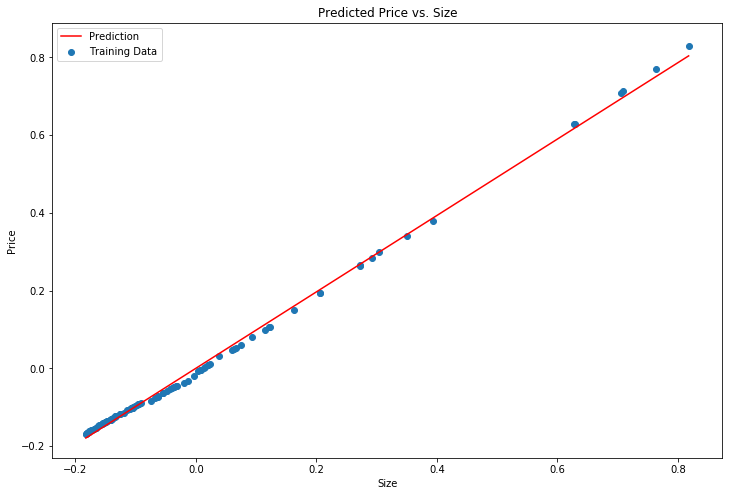

In [372]:
X= data.Size
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X, model_price, 'r', label='Prediction')
ax.scatter(data.Size, data.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted Price vs. Size')

Text(0.5, 1.0, 'Error vs. Iterations')

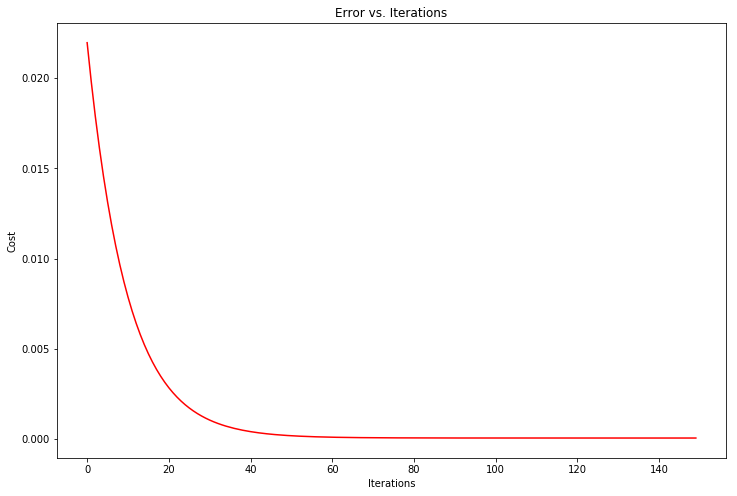

In [373]:
fig, ax =plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

In [374]:
import math
erro_r = [np.power((b-a),2) for (a, b) in zip (model_price, y)]
error0 = np.sum(erro_r)
error1 = math.sqrt(error0)
error = (error1/len(y)) * 100
print( " error % = {}".format(error))
accuracy = 100 - error
print(" accuracy %={}".format(accuracy))

 error % = 0.10627319469129681
 accuracy %=99.8937268053087


In [375]:
def predict(new_theta, accuracy):
    size= float(input("enter the size of the House in sqft:"))
    size= (size-raw_data.Size.mean())/(raw_data.Size.max()-raw_data.Size.min())
    price=(new_theta[0,0]+(new_theta[0,1]*size))
    Predicted_Price=(price * (raw_data.Price.max()-raw_data.Price.min()))+raw_data.Price.mean()
    Price_at_Max_Accuracy=(Predicted_Price * (1/accuracy)*100)
    Price_range=Price_at_Max_Accuracy - Predicted_Price
    return Predicted_Price, Price_range

In [376]:
Predicted_Price, Price_range=predict(new_theta, accuracy)
print('Your house cost is '+ str(Predicted_Price) +'Lakhs'+'(+ or -)'+str(Price_range)+'Lakhs')

enter the size of the House in sqft:1234
Your house cost is 39.07015600761393Lakhs(+ or -)0.041565275706538785Lakhs
